In [1]:
from knowledge_graph import build_nx_graph, goldstandard_Graph, get_DiGraph_from_file, get_AC1_Graph_from_file, read_concepts_from_file, ac1_Graph
from sparql_queries import query_paths_to_entity
from preprocessing import get_cscw19_gold_ideas_in_format
from connection import convert_dbp_wikid_ids
from visualize import get_graphic_G, color_map
from analytics import get_subgraph_from, get_subgraph_from_dac, remove_backward_edges

In [2]:
import networkx as nx
import json
import matplotlib.pyplot as plt

In [3]:
DiGold = get_DiGraph_from_file()

In [4]:
concepts = read_concepts_from_file("data/gold_wiki_concepts.json")

In [5]:
ac1_concepts = read_concepts_from_file("data/ac1_wiki_concepts.json")

In [6]:
DiAC1 = get_AC1_Graph_from_file()

In [7]:
dac = remove_backward_edges(DiGold, "Q35120")
print(len(list(dac.edges())), len(list(DiGold.edges())), len(list(nx.edge_dfs(DiGold, "Q35120"))))

3705 3888 3848


In [8]:
from IPython.display import Image, display

def draw_graph(name, graph, concepts):
    concepts_in_graph = [n for n in concepts if n[0] in graph.nodes()]
    g = get_graphic_G(graph, concepts_in_graph)
    im = Image(g.create_png())
    display(im)
    g.write_png(name+".png")


In [19]:
nx.floyd_warshall_numpy(SubG_AC1)

matrix([[ 0., inf, inf,  1.,  2., inf,  1., inf, inf, inf, inf, inf,  4.,
         inf,  3.,  1.,  2., inf, inf,  2., inf, inf, inf],
        [inf,  0., inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
         inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf,  0., inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
         inf, inf, inf, inf, inf, inf, inf, inf,  1., inf],
        [inf, inf, inf,  0.,  1., inf, inf, inf, inf, inf, inf, inf,  3.,
         inf,  2., inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf,  0., inf, inf, inf, inf, inf, inf, inf,  2.,
         inf,  1., inf, inf, inf, inf, inf, inf, inf, inf],
        [inf,  3., inf, inf, inf,  0., inf, inf, inf,  1., inf,  2., inf,
         inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf,  3.,  4., inf,  0., inf, inf, inf, inf, inf,  6.,
         inf,  5., inf,  1., inf, inf,  2., inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf,  0., inf, inf,  1.

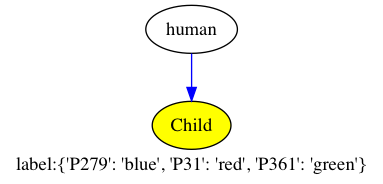

In [10]:
SubG = get_subgraph_from_dac(dac,"Q5")
draw_graph("pic/Q1",SubG , concepts)

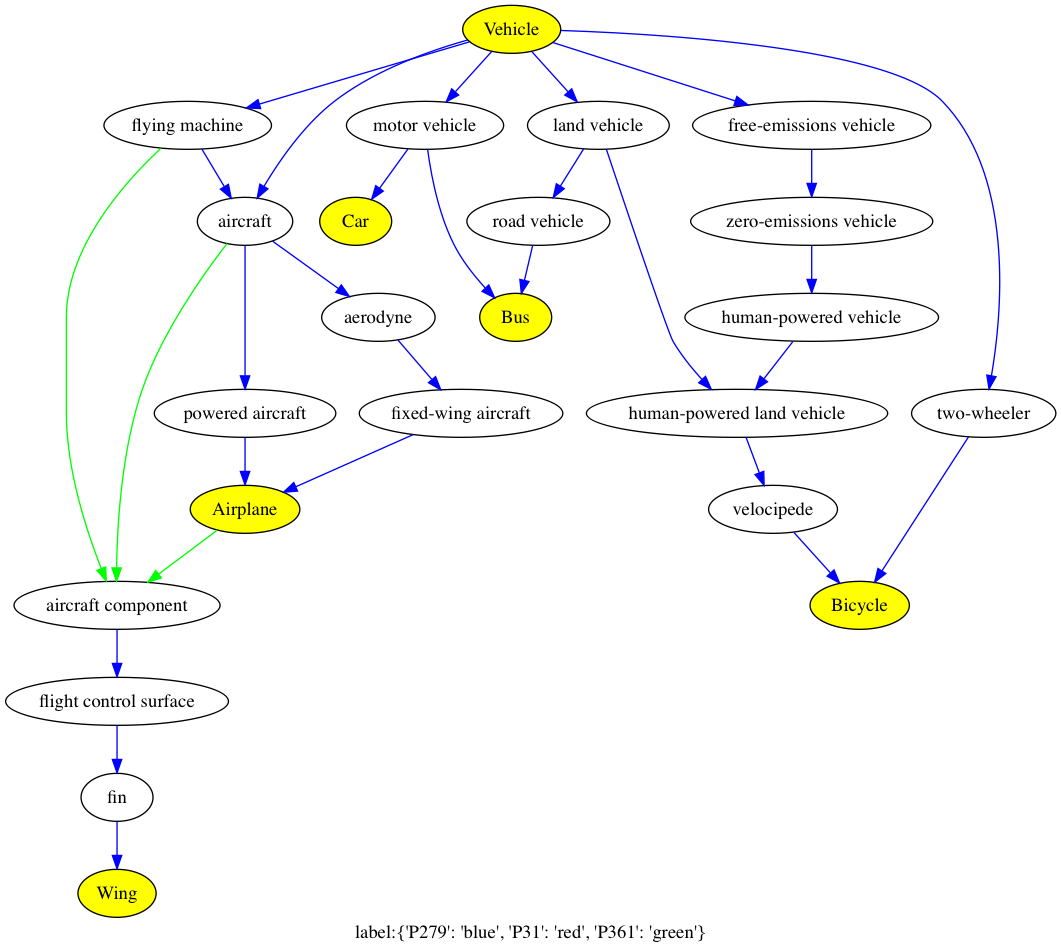

In [11]:
SubG_AC1 = get_subgraph_from(DiAC1,"Q42889", 10)
draw_graph("pic/vehicle_subgraph_ac1",SubG_AC1 , ac1_concepts)

In [12]:
nx.descendants(dac, "Q35120")

{'Q27062218',
 'Q580234',
 'Q11694395',
 'Q1075138',
 'Q1068473',
 'Q4485156',
 'Q382698',
 'Q2200417',
 'Q1150958',
 'Q183484',
 'Q506095',
 'Q2249149',
 'Q329182',
 'Q4479242',
 'Q47407603',
 'Q11578774',
 'Q40287877',
 'Q2184715',
 'Q26897143',
 'Q1395034',
 'Q898786',
 'Q9420',
 'Q8436',
 'Q130998',
 'Q362482',
 'Q190087',
 'Q40397',
 'Q639907',
 'Q193181',
 'Q20978643',
 'Q966668',
 'Q18357734',
 'Q12684',
 'Q196883',
 'Q131207',
 'Q190771',
 'Q3482410',
 'Q2752458',
 'Q42197437',
 'Q26965868',
 'Q31464082',
 'Q39653372',
 'Q1207505',
 'Q327055',
 'Q284347',
 'Q1519524',
 'Q517596',
 'Q8148',
 'Q321046',
 'Q873636',
 'Q8513',
 'Q6498784',
 'Q3554820',
 'Q747883',
 'Q350783',
 'Q848436',
 'Q2207370',
 'Q8253',
 'Q18336849',
 'Q30249972',
 'Q34654702',
 'Q124946',
 'Q2997362',
 'Q57660343',
 'Q20088819',
 'Q1144560',
 'Q33120876',
 'Q2313235',
 'Q17781690',
 'Q11253473',
 'Q8778429',
 'Q5362345',
 'Q66744517',
 'Q4167836',
 'Q930933',
 'Q370502',
 'Q23009552',
 'Q1129239',
 'Q103003